In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
#Importing data set in Pandas DataFrame
df = pd.read_csv('logistic_regression.csv')

In [3]:
#Snapshot of first 5 rows
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## 1. Define Problem Statement and perform Exploratory Data Analysis

### 1) Definition of problem

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

### 2) Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [4]:
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [8]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


### 3) Univariate Analysis

In [9]:
cat_col = list(df.dtypes.loc[df.dtypes == "object"].index)
num_col = list(df.dtypes.loc[df.dtypes != "object"].index)

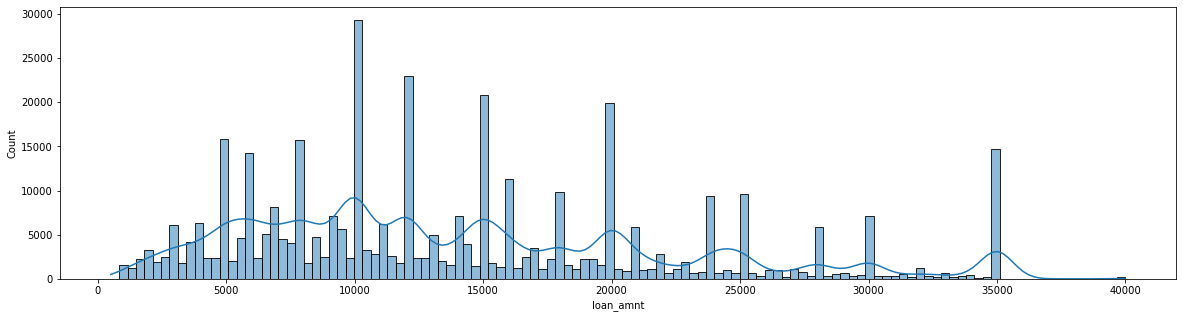

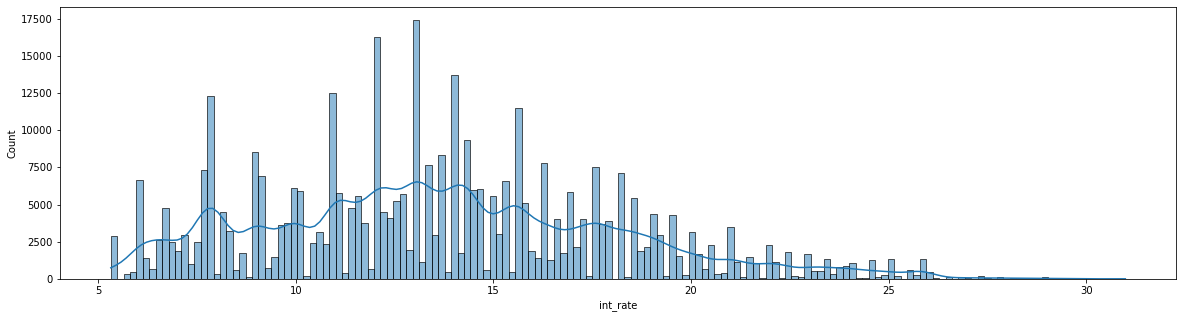

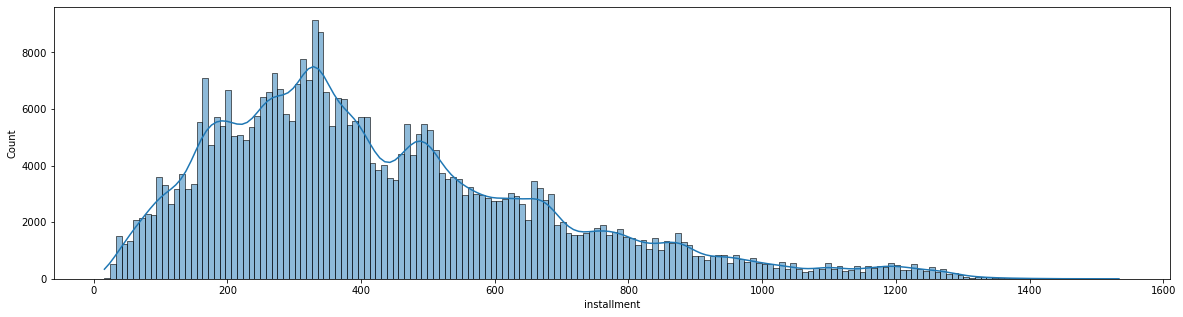

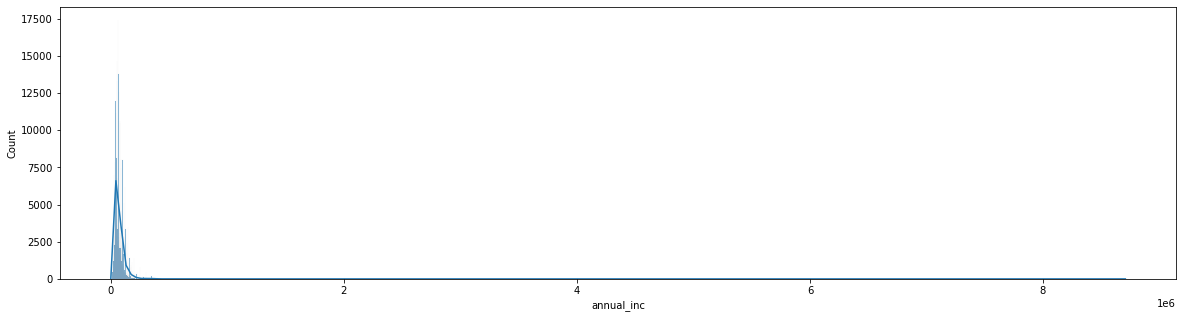

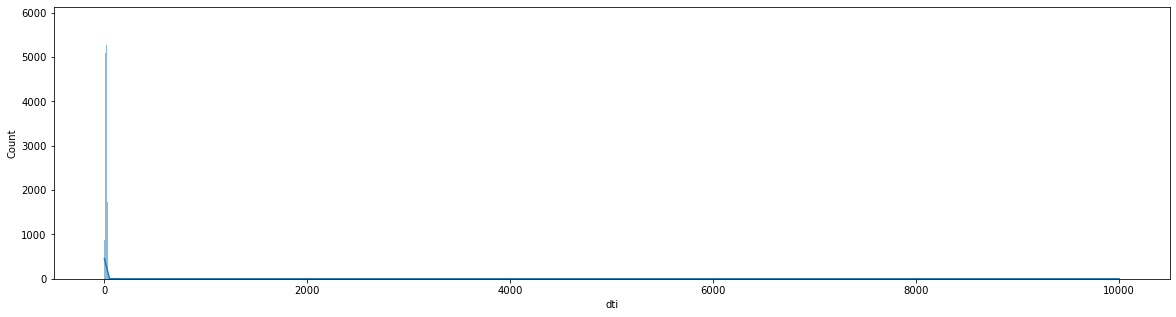

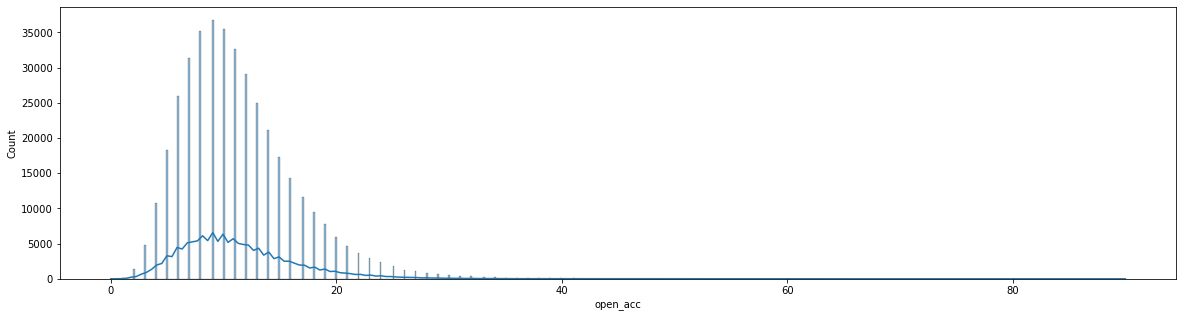

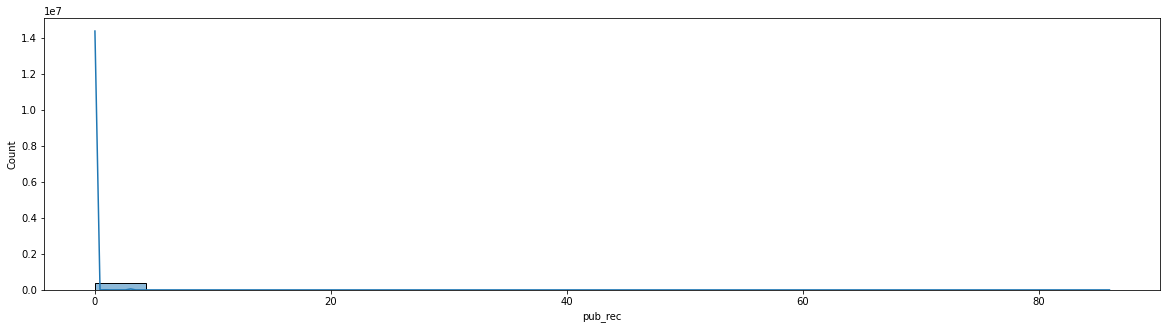

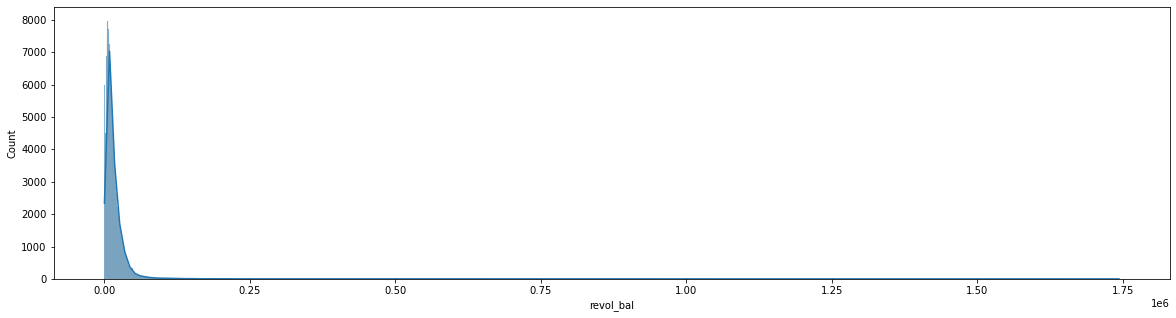

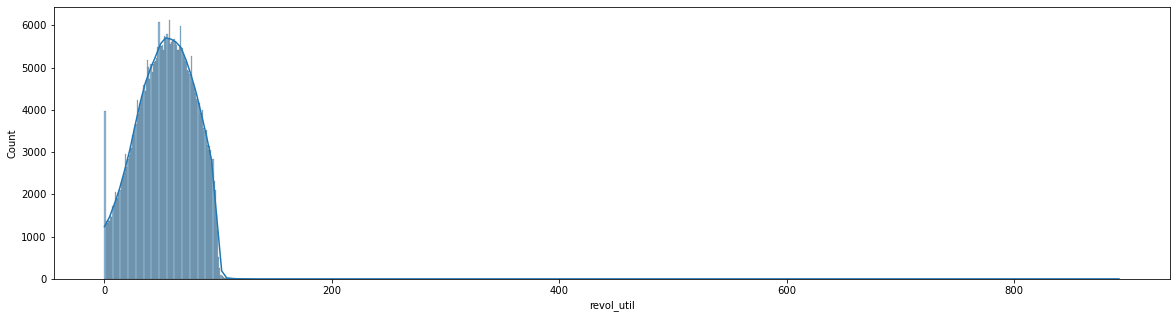

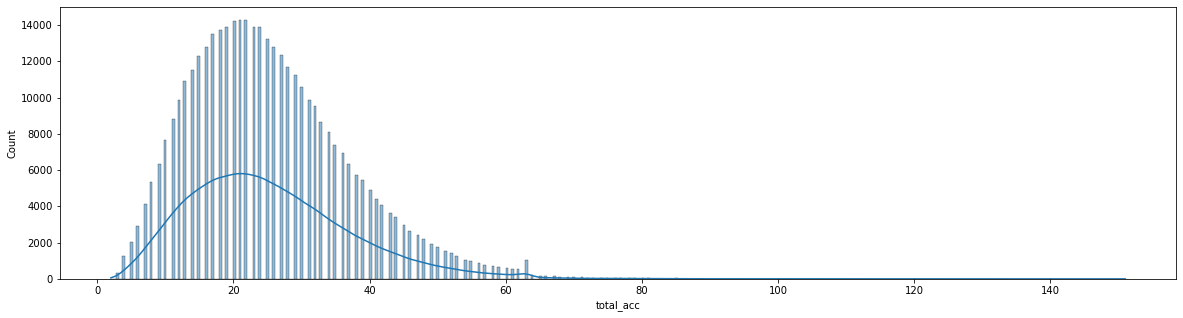

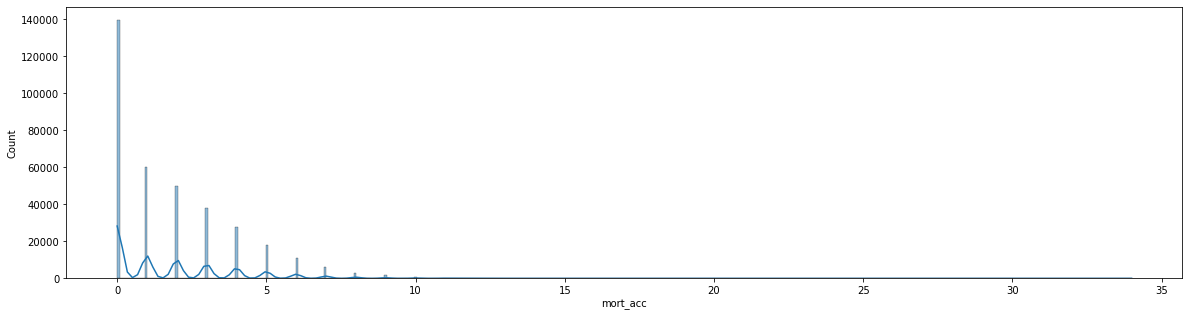

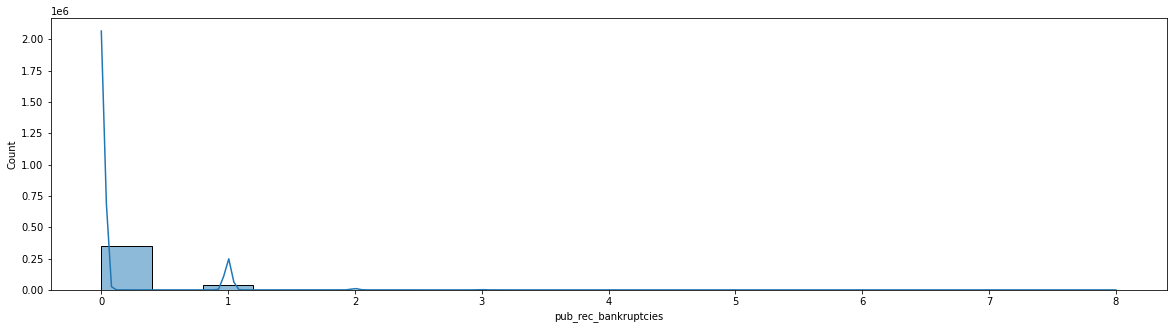

In [10]:
for i in num_col:
    plt.figure(figsize = (20,5))
    sns.histplot(x=df[i], kde=True)
    plt.show()

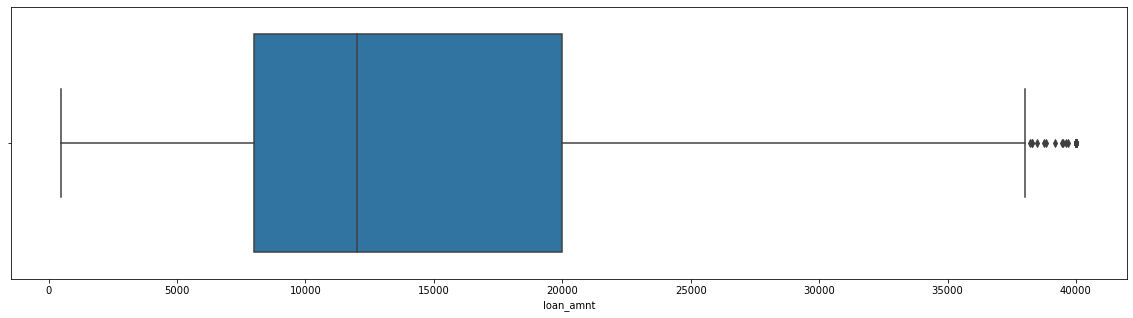

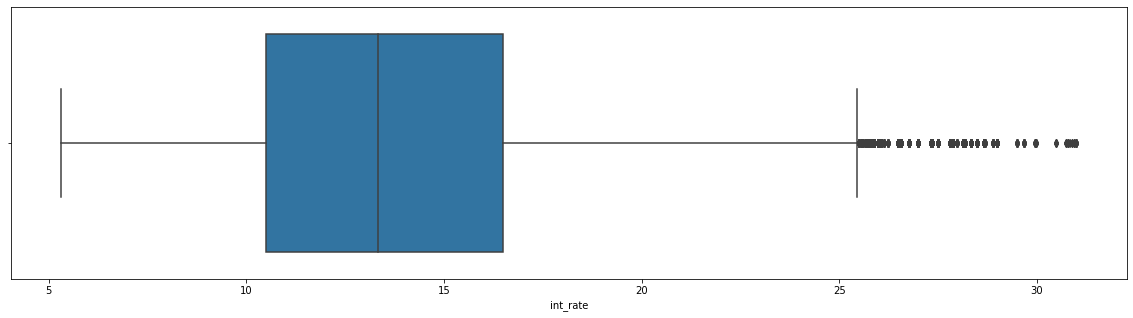

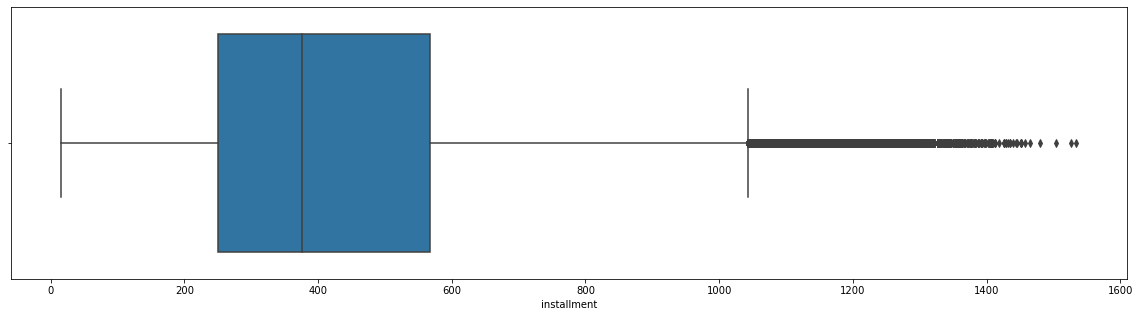

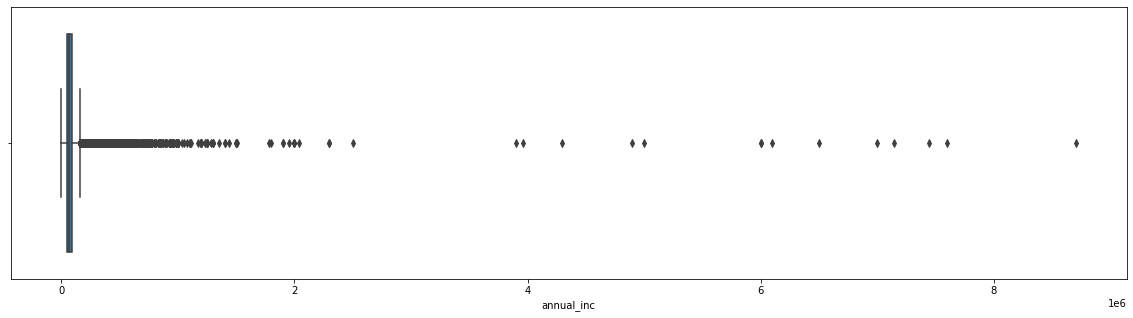

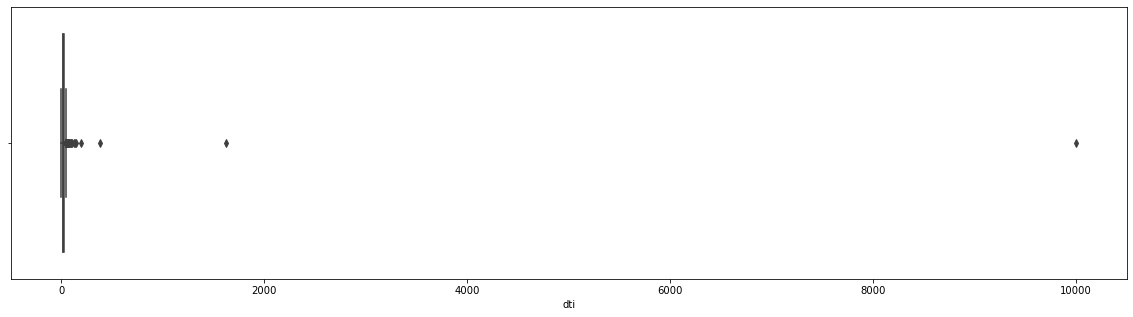

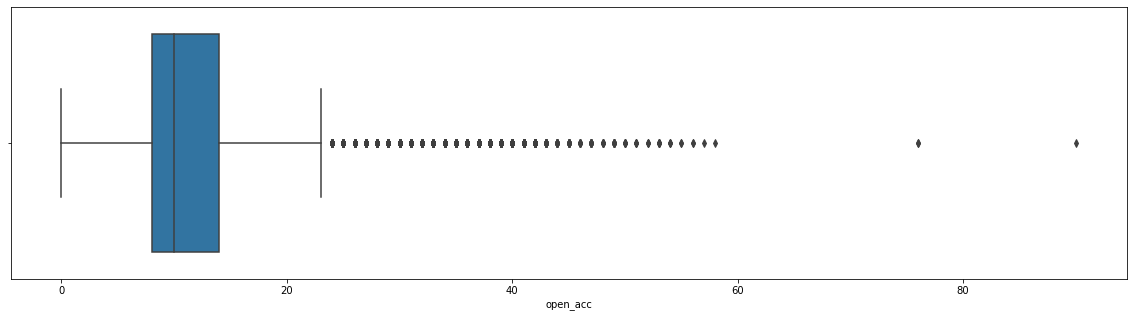

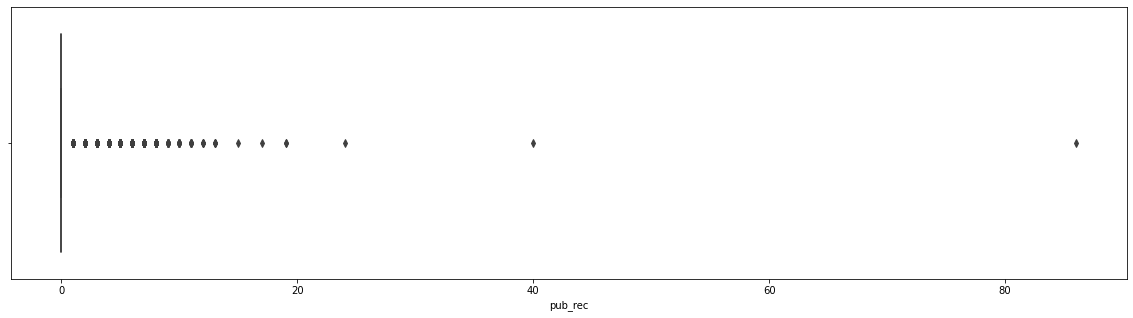

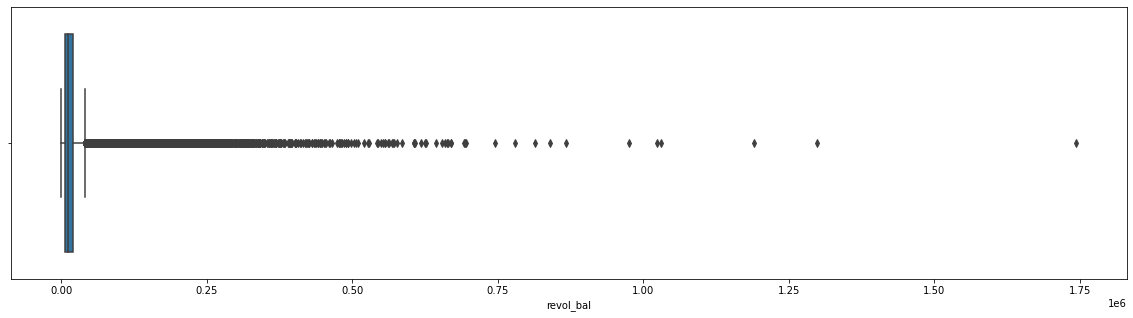

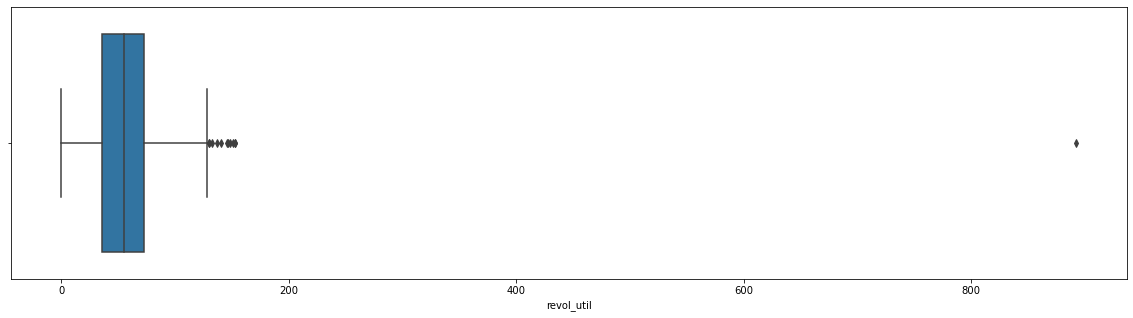

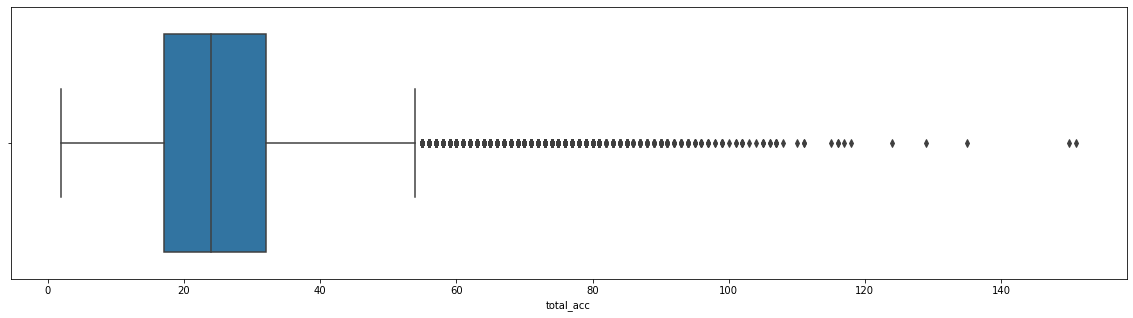

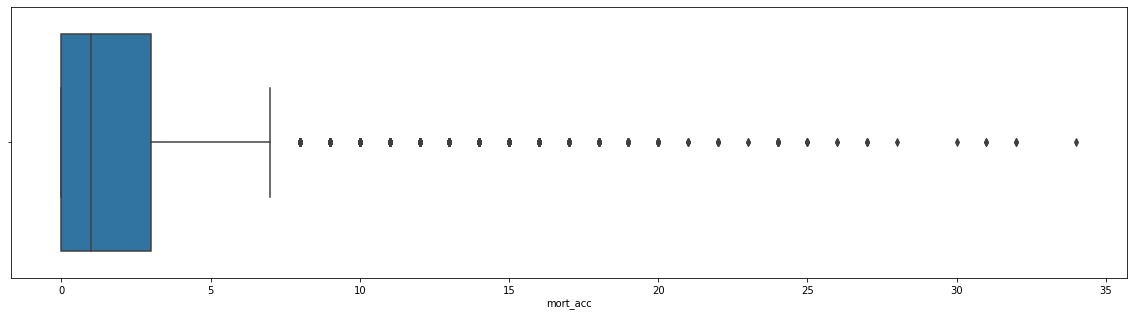

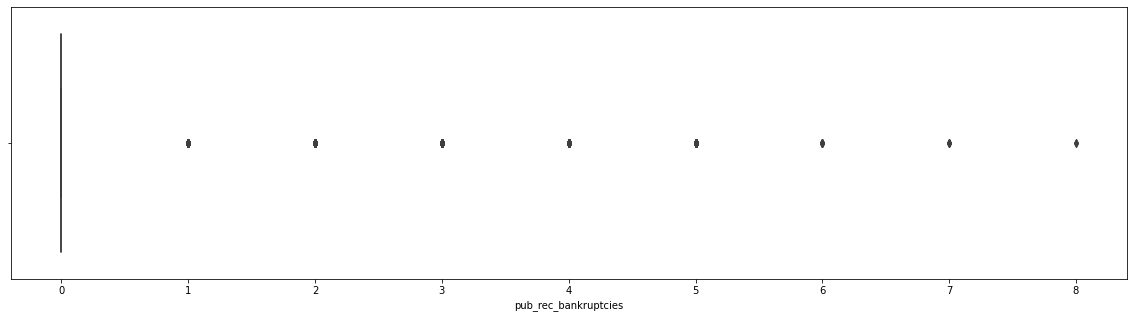

In [11]:
for i in num_col:
    plt.figure(figsize = (20,5))
    sns.boxplot(x=df[i])
    plt.show()

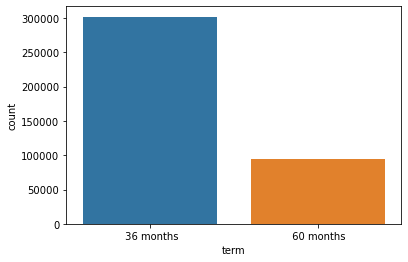

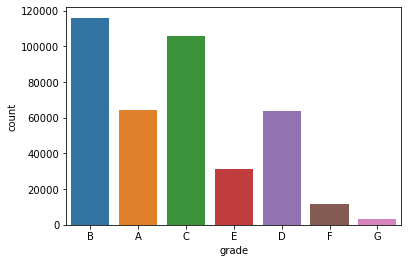

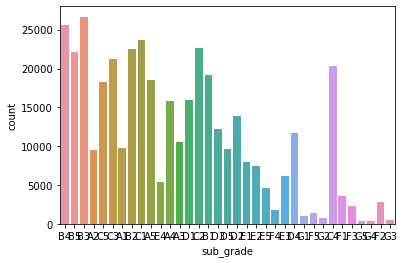

KeyboardInterrupt: 

In [38]:
for i in cat_col:
    plt.figure(figsize = (20,5))
    sns.countplot(x=df[i])
    plt.show()

### 4) Bivariate Analysis

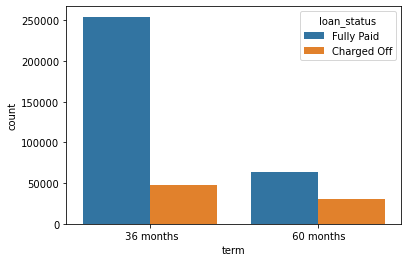

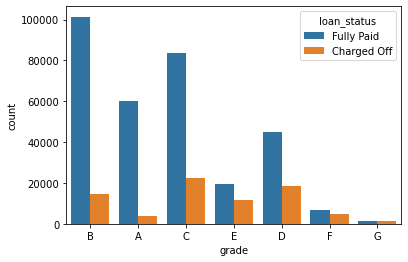

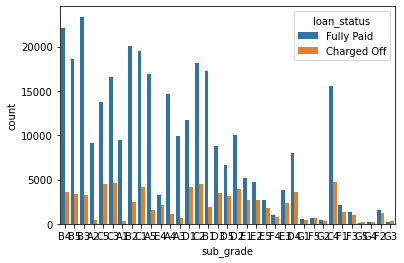

In [ ]:
for i in cat_col:
    plt.figure(figsize = (20,5))
    sns.countplot(x=df[i], hue=df['loan_status'])
    plt.show()

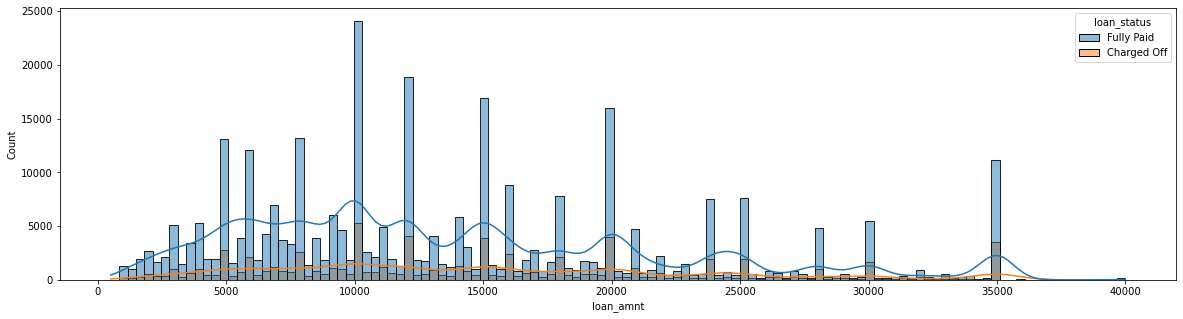

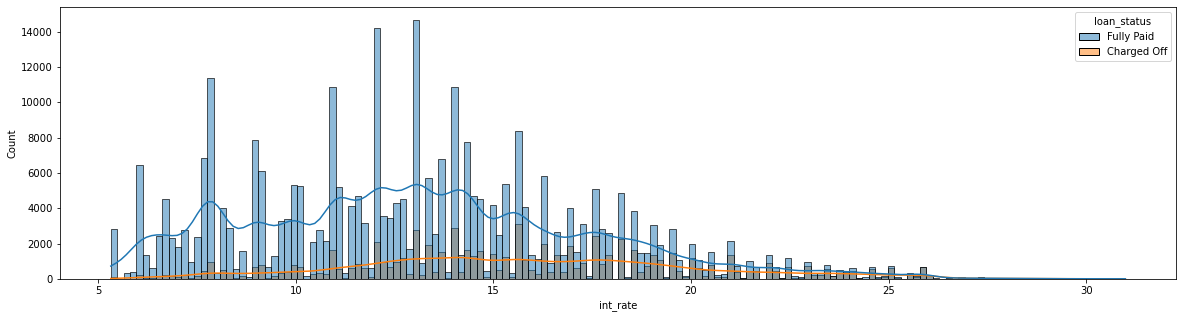

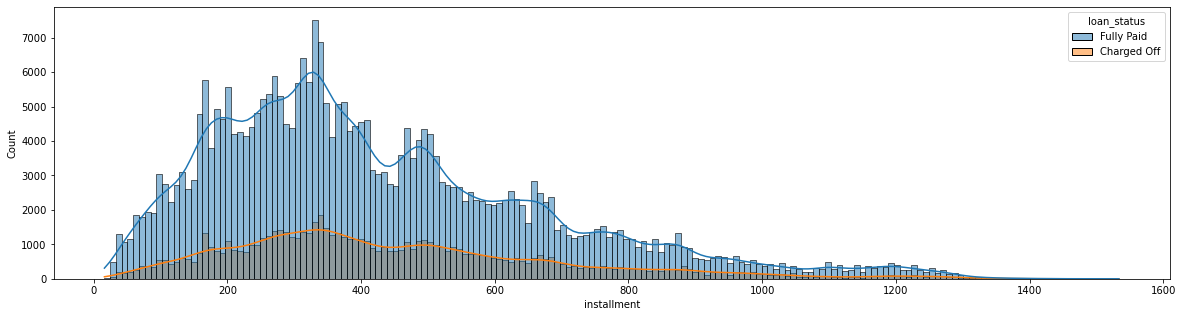

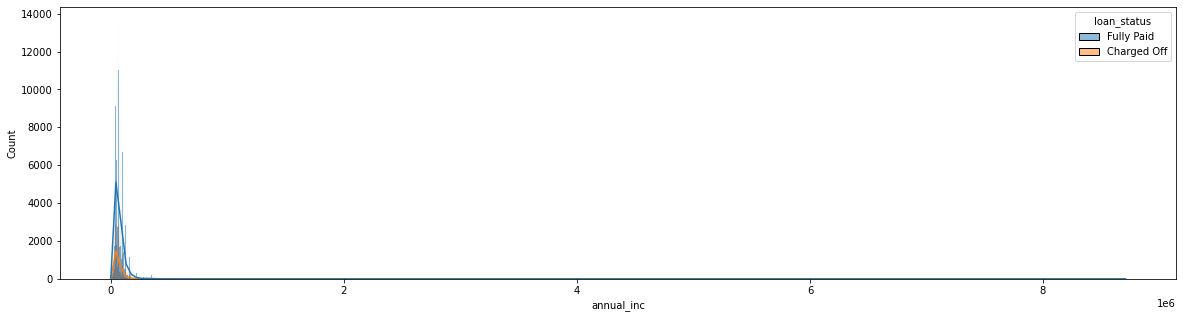

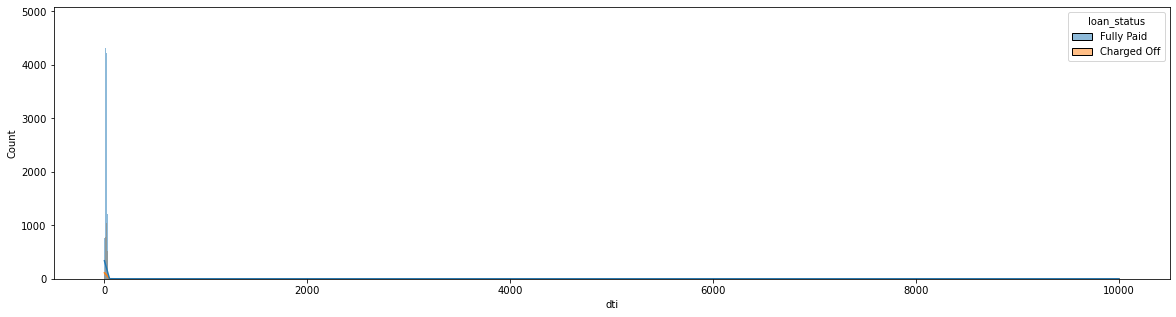

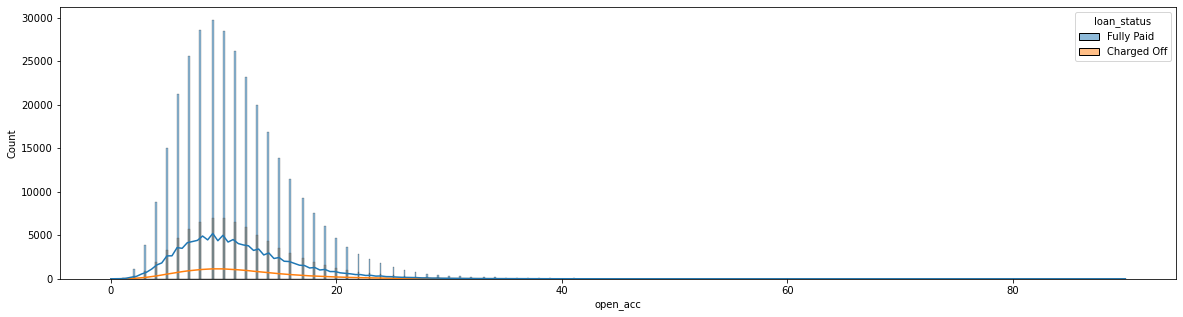

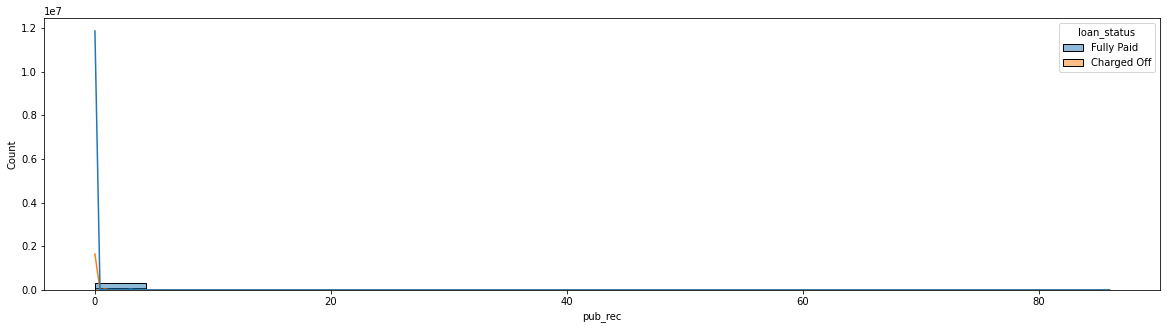

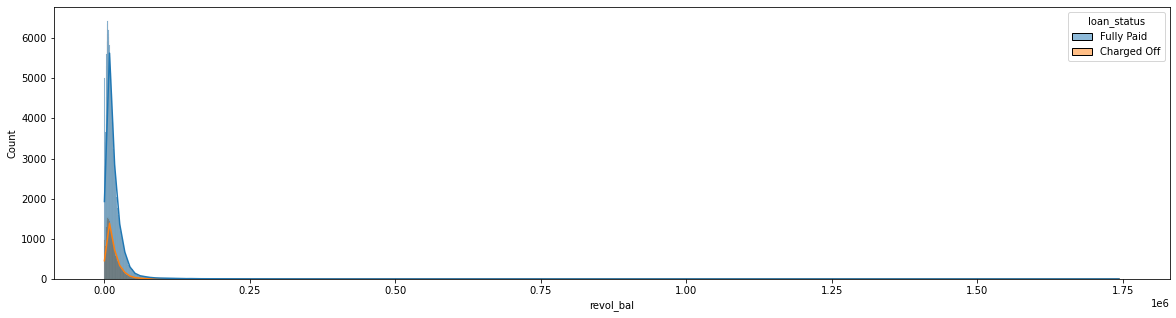

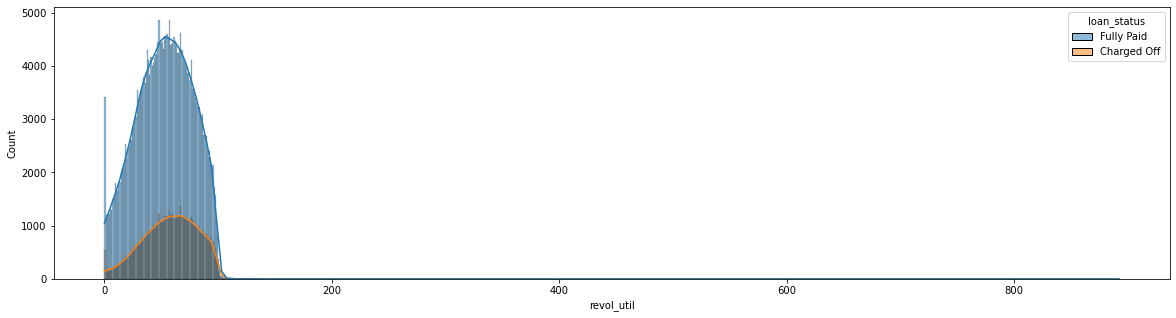

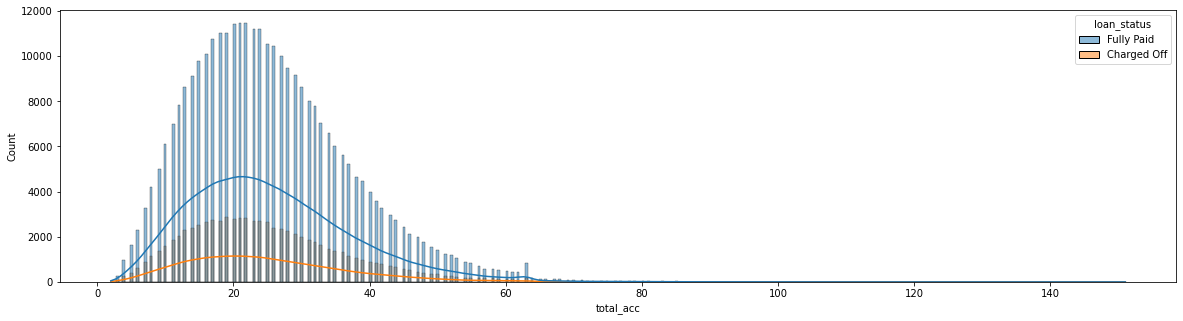

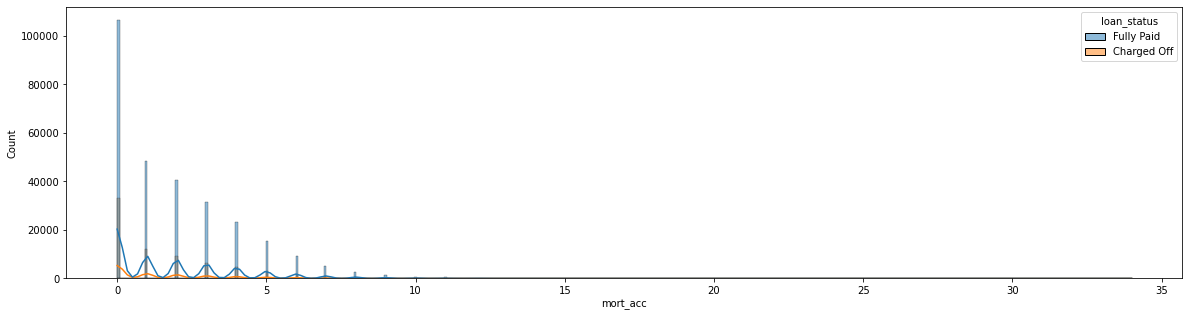

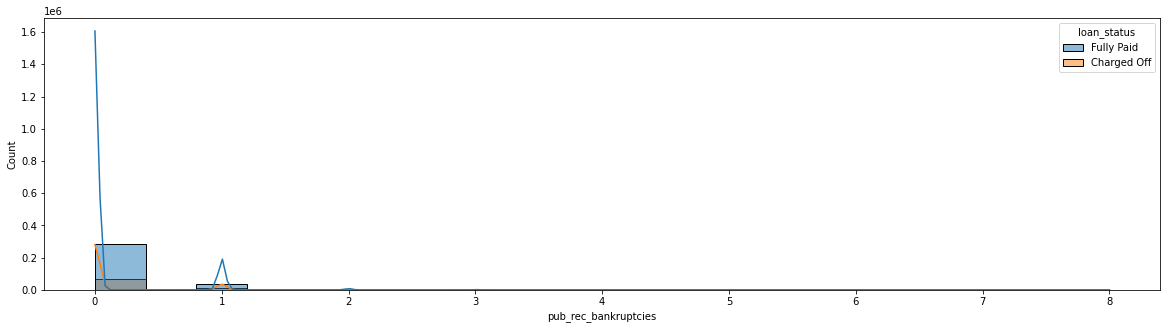

In [12]:
for i in num_col:
    plt.figure(figsize = (20,5))
    sns.histplot(x=df[i], kde=True, hue=df['loan_status'])
    plt.show()

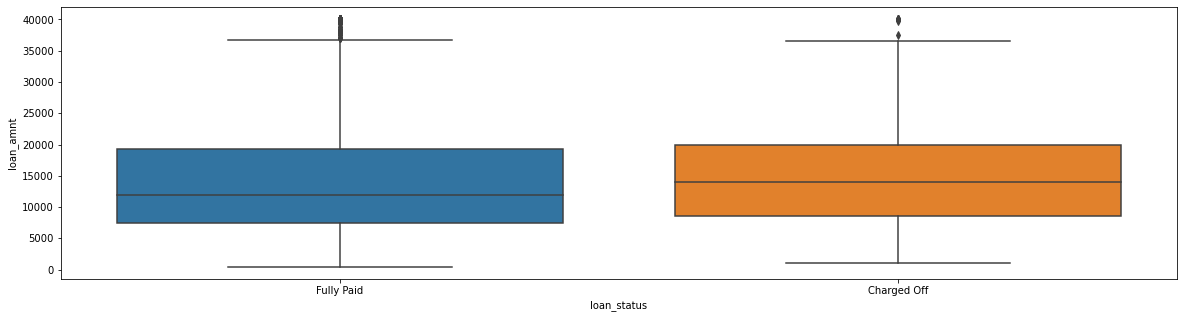

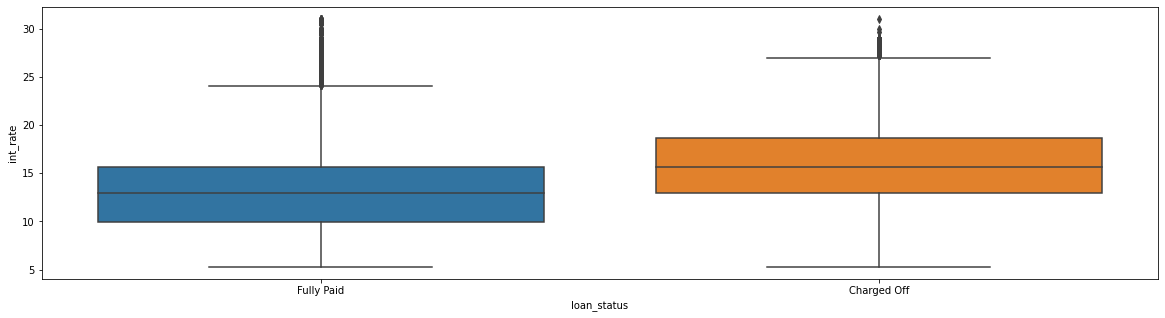

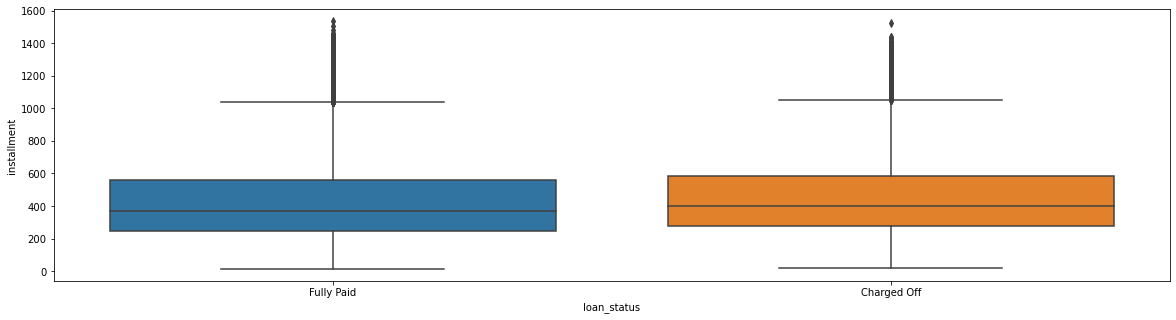

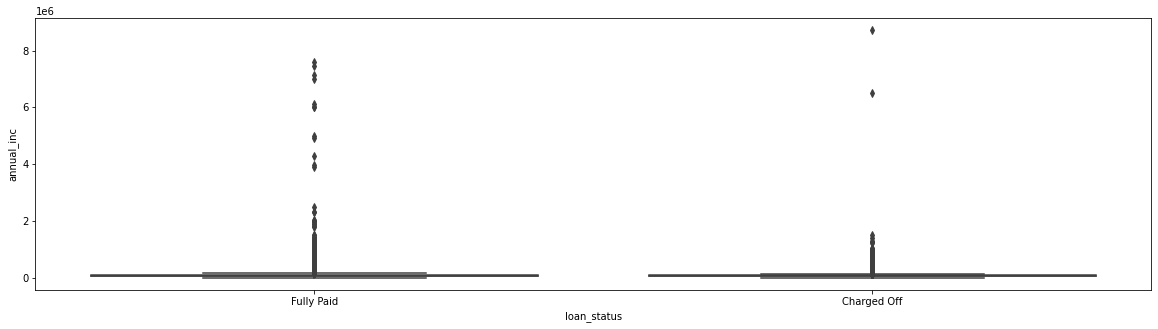

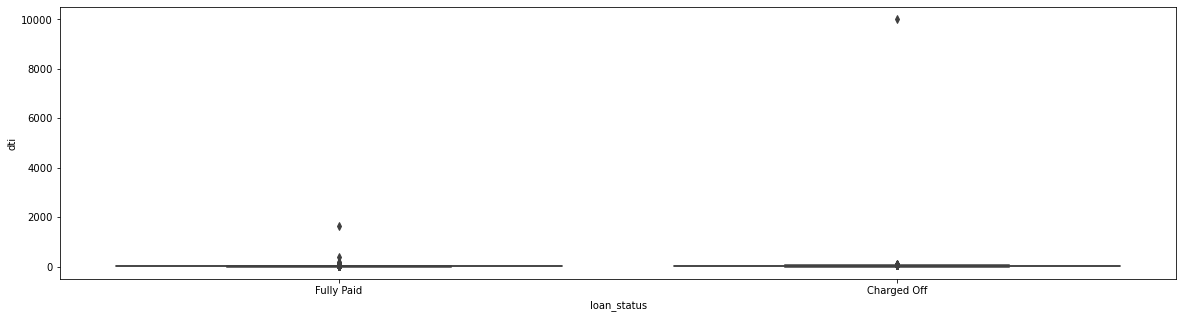

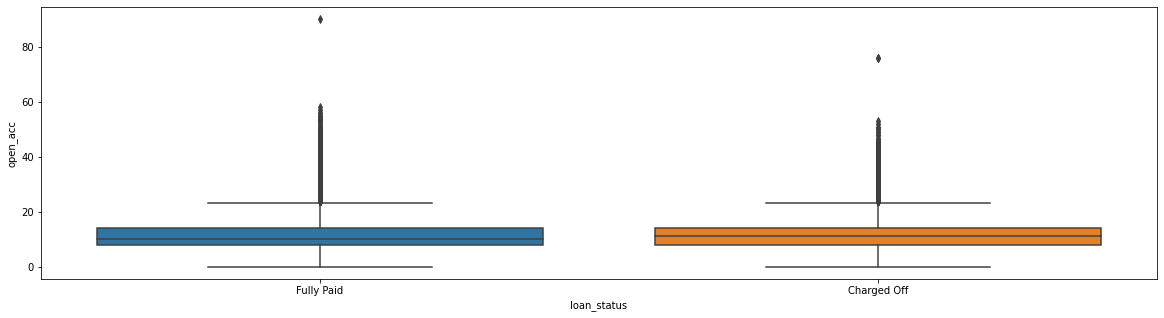

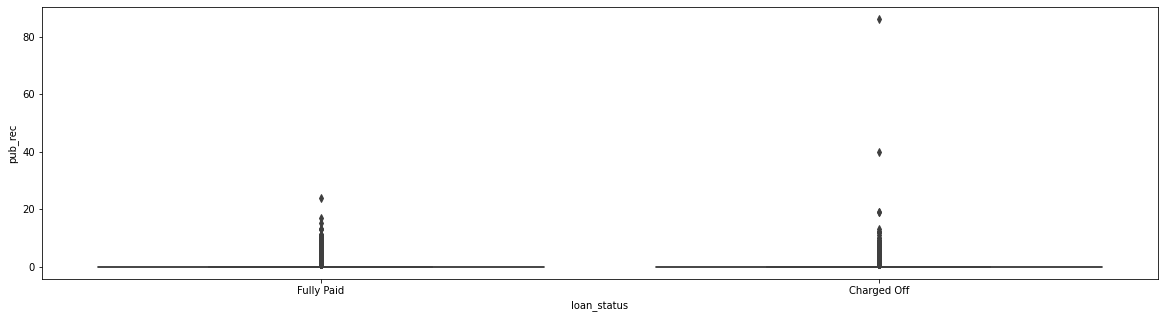

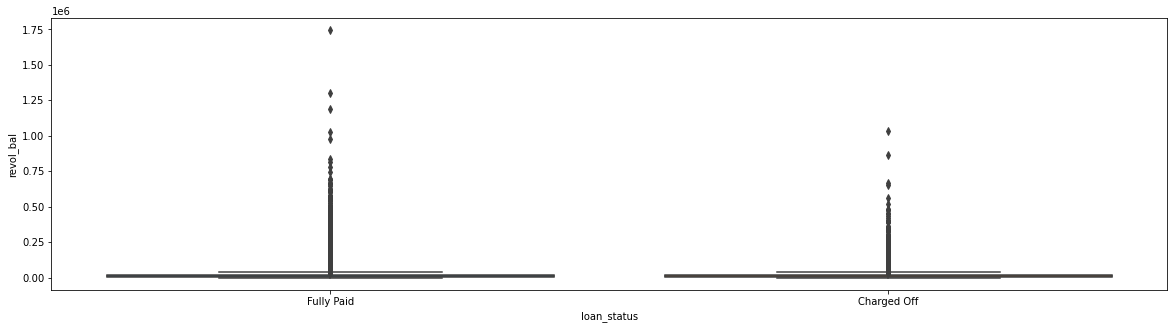

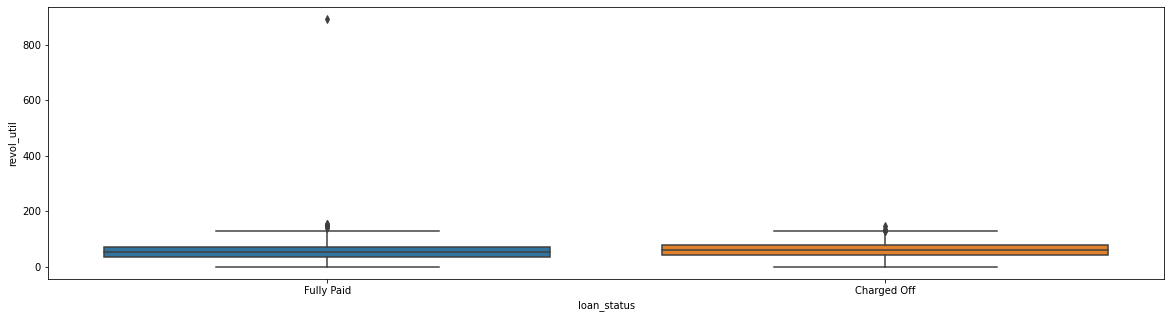

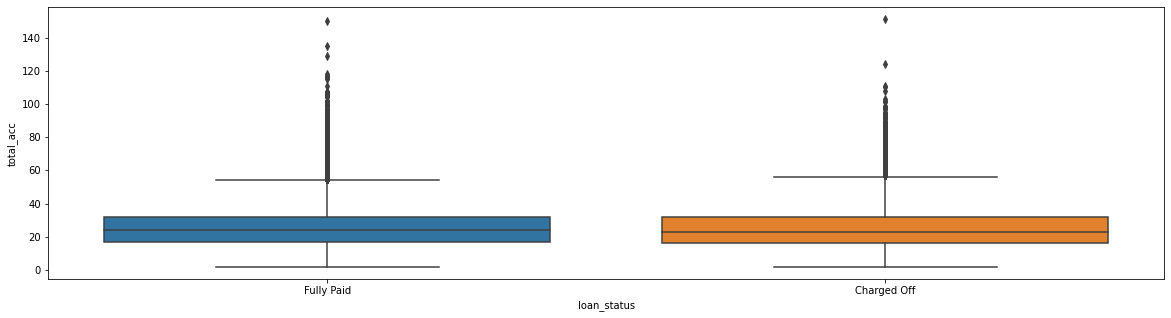

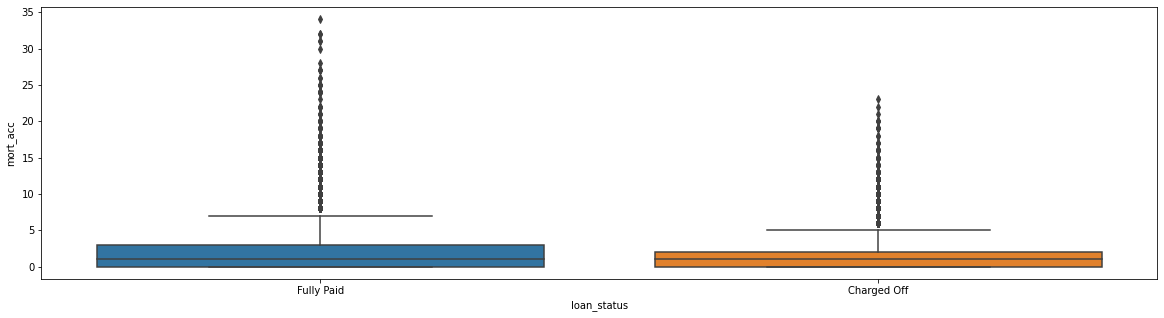

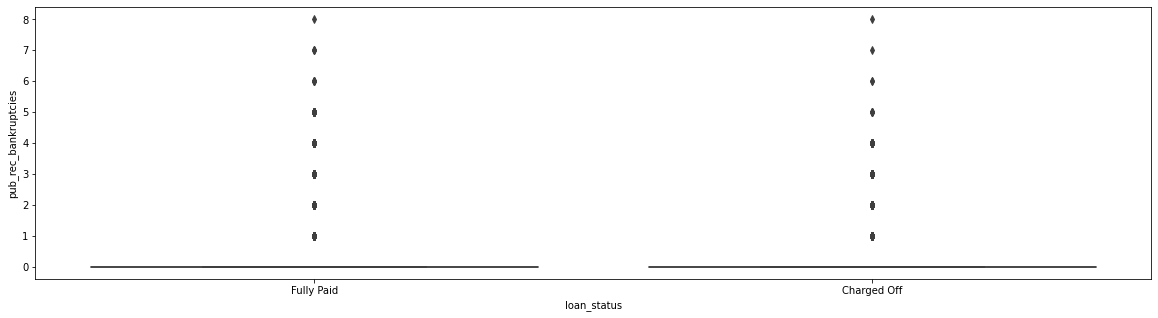

In [13]:
for i in num_col:
    plt.figure(figsize = (20,5))
    sns.boxplot(y=df[i], x=df['loan_status'])
    plt.show()

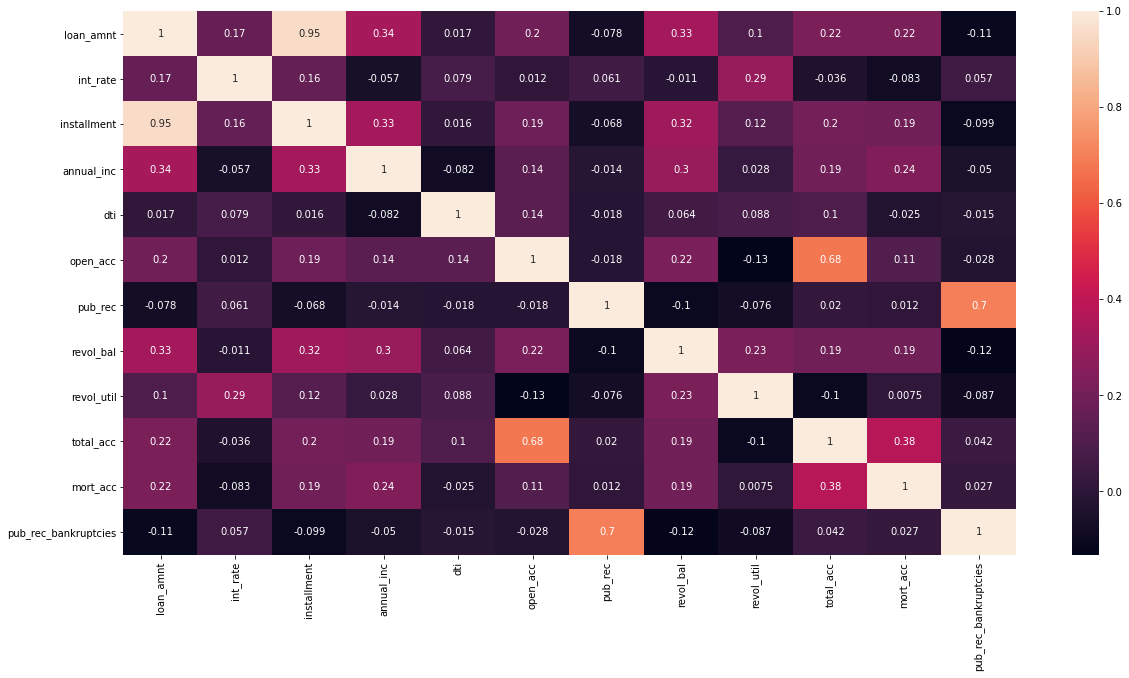

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(data = df.corr() , annot=True)
plt.show()

## 2. Data Preprocessing

### 1) Duplicate value check

In [139]:
df.duplicated().sum()

0

The data set doesn't contain any duplicates.

### 2) Missing value treatment

In [140]:
df.isna().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
dtype: float64

In [141]:
df.emp_title.fillna('Unknown', inplace=True)

In [142]:
df.emp_length.value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [143]:
df['emp_length'] = df['emp_length'].replace({'< 1 year':'1 years','10+ years':'10 years',np.nan:'-1 years'}).str[:-5].str.strip()

In [144]:
df.emp_length.value_counts()

10    126041
1      57607
2      35827
3      31665
5      26495
4      23952
6      20841
7      20819
8      19168
-1     18301
9      15314
Name: emp_length, dtype: int64

In [145]:
df.title.fillna('Unknown', inplace=True)

In [146]:
df.revol_util.fillna(df.revol_util.median(), inplace=True)

In [147]:
df.mort_acc.fillna(df.mort_acc.mode()[0], inplace=True)

In [148]:
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.median(), inplace=True)

### 3) Outlier treatment

In [149]:
np.percentile(df['loan_amnt'], np.linspace(0, 100, 11))

array([  500.,  5000.,  6625.,  8650., 10000., 12000., 15000., 17975.,
       20500., 26000., 40000.])

In [150]:
np.percentile(df['loan_amnt'], np.linspace(90, 100, 11))

array([26000., 28000., 28000., 29750., 30000., 30975., 33600., 35000.,
       35000., 35000., 40000.])

It is seen from above that there is a huge increase after 99 percentile. We can ignore values greater than 99th percentile.

In [151]:
df = df.loc[np.percentile(df['loan_amnt'], 99) >= df['loan_amnt']]

In [152]:
np.percentile(df['int_rate'], np.linspace(0, 100, 11))

array([ 5.32,  7.89,  9.67, 11.12, 12.29, 13.33, 14.33, 15.61, 17.57,
       19.52, 30.99])

In [153]:
np.percentile(df['int_rate'], np.linspace(90, 100, 11))

array([19.52, 19.91, 20.2 , 20.75, 21.  , 21.97, 22.4 , 23.28, 24.08,
       25.28, 30.99])

It is seen from above that there is a huge increase after 99 percentile. We can ignore values greater than 99 percentile.

In [154]:
df = df.loc[np.percentile(df['int_rate'], 99) >= df['int_rate']]

In [155]:
np.percentile(df['installment'], np.linspace(0, 100, 11))

array([  16.08,  158.47,  217.67,  274.71,  325.74,  373.94,  441.91,
        514.93,  623.88,  779.84, 1396.79])

In [156]:
np.percentile(df['installment'], np.linspace(90, 100, 11))

array([ 779.84  ,  800.48  ,  826.43  ,  856.54  ,  880.61  ,  917.0405,
        961.47  , 1018.5   , 1111.75  , 1201.33  , 1396.79  ])

It is seen from above that there is a huge increase after 99 percentile. We can ignore values greater than 99 percentile.

In [157]:
df = df.loc[np.percentile(df['installment'], 99) >= df['installment']]

In [158]:
np.percentile(df['annual_inc'], np.linspace(0, 100, 11))

array([      0.,   34000.,   42000.,   49600.,   55000.,   63000.,
         71040.,   81000.,   96000.,  120000., 8706582.])

In [159]:
np.percentile(df['annual_inc'], np.linspace(90, 100, 11))

array([ 120000.,  125000.,  130000.,  135000.,  140000.,  150000.,
        157000.,  172000.,  196000.,  240000., 8706582.])

It is seen from above that there is a huge increase after 98 percentile. We can ignore values greater than 98 percentile.

In [160]:
df = df.loc[np.percentile(df['annual_inc'], 98) >= df['annual_inc']]

In [161]:
np.percentile(df['dti'], np.linspace(0, 100, 11))

array([0.000e+00, 7.050e+00, 1.018e+01, 1.262e+01, 1.484e+01, 1.703e+01,
       1.928e+01, 2.170e+01, 2.456e+01, 2.856e+01, 9.999e+03])

In [162]:
np.percentile(df['dti'], np.linspace(90, 100, 11))

array([  28.56,   29.05,   29.58,   30.17,   30.87,   31.62,   32.44,
         33.36,   34.39,   36.43, 9999.  ])

It is seen from above that there is a huge increase after 99 percentile. We can ignore values greater than 99 percentile.

In [163]:
df = df.loc[np.percentile(df['dti'], 99) >= df['dti']]

In [164]:
np.percentile(df['open_acc'], np.linspace(0, 100, 11))

array([ 0.,  6.,  7.,  8.,  9., 10., 12., 13., 15., 18., 90.])

In [165]:
np.percentile(df['open_acc'], np.linspace(90, 100, 11))

array([18., 18., 19., 19., 20., 21., 22., 23., 24., 27., 90.])

It is seen from above that there is a huge increase after 99 percentile. We can ignore values greater than 99 percentile.

In [166]:
df = df.loc[np.percentile(df['open_acc'], 99) >= df['open_acc']]

In [167]:
np.percentile(df['revol_bal'], np.linspace(0, 100, 11))

array([     0. ,   3046. ,   5011. ,   6816.6,   8734. ,  10889. ,
        13447. ,  16744. ,  21514. ,  29926. , 814300. ])

In [168]:
np.percentile(df['revol_bal'], np.linspace(90, 100, 11))

array([ 29926.  ,  31188.  ,  32596.  ,  34264.  ,  36187.88,  38562.  ,
        41621.  ,  46102.82,  53548.84,  73019.9 , 814300.  ])

It is seen from above that there is a huge increase after 96 percentile. We can ignore values greater than 96 percentile.

In [169]:
df = df.loc[np.percentile(df['revol_bal'], 96) >= df['revol_bal']]

In [170]:
np.percentile(df['revol_util'], np.linspace(0, 100, 11))

array([  0. ,  19.5,  30.9,  39.4,  47. ,  54.1,  61. ,  68.3,  76.2,
        85.6, 892.3])

In [171]:
np.percentile(df['revol_util'], np.linspace(90, 100, 11))

array([ 85.6,  86.7,  87.9,  89.1,  90.3,  91.6,  93. ,  94.4,  96. ,
        97.8, 892.3])

It is seen from above that there is a huge increase after 99 percentile. We can ignore values greater than 99 percentile.

In [172]:
df = df.loc[np.percentile(df['revol_util'], 99) >= df['revol_util']]

In [173]:
np.percentile(df['total_acc'], np.linspace(0, 100, 11))

array([  2.,  11.,  15.,  18.,  20.,  23.,  26.,  29.,  34.,  40., 116.])

In [174]:
np.percentile(df['total_acc'], np.linspace(90, 100, 11))

array([ 40.,  41.,  42.,  43.,  44.,  46.,  47.,  50.,  53.,  58., 116.])

It is seen from above that there is a huge increase after 99 percentile. We can ignore values greater than 99 percentile.

In [175]:
df = df.loc[np.percentile(df['total_acc'], 99) >= df['total_acc']]

### 4) Feature engineering

In [176]:
df.loc[df.pub_rec>1, ['pub_rec']] = 1
df.loc[df.mort_acc>1, ['mort_acc']] = 1
df.loc[df.pub_rec_bankruptcies>1, ['pub_rec_bankruptcies']] = 1

In [177]:
df.term.value_counts()

 36 months    272282
 60 months     79203
Name: term, dtype: int64

In [178]:
df['term'] = df.term.str[:-7].astype('int64')

In [179]:
df.verification_status.str.strip().value_counts()

Verified           118108
Not Verified       118065
Source Verified    115312
Name: verification_status, dtype: int64

In [180]:
df['verification_status'].replace({'Verified' : 1, 'Source Verified' : 1 , 'Not Verified' : 0}, inplace = True)

In [181]:
df['issue_month'] = df['issue_d'].str[:3]
df['issue_year'] = df['issue_d'].str[-4:]
df.drop(['issue_d'], inplace = True, axis = 1)

In [182]:
df['issue_year'] = df['issue_year'].astype('int64')

In [183]:
df['issue_month'].replace({'Jan' : 1, 
'Feb' : 2, 
'Mar' : 3, 
'Apr' : 4, 
'May' : 5, 
'Jun' : 6, 
'Jul' : 7, 
'Aug' : 8, 
'Sep' : 9, 
'Oct' : 10, 
'Nov' : 11, 
'Dec' : 12
}, inplace=True)

In [184]:
df.loan_status.value_counts()

Fully Paid     284075
Charged Off     67410
Name: loan_status, dtype: int64

In [185]:
df['loan_status'].replace({'Fully Paid' : 1, 'Charged Off' : 0}, inplace = True)

In [186]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].str[:3]
df['earliest_cr_line_year'] = df['earliest_cr_line'].str[-4:]
df.drop(['earliest_cr_line'], inplace = True, axis = 1)

In [187]:
df['earliest_cr_line_year'] = df['earliest_cr_line_year'].astype('int64')

In [188]:
df['earliest_cr_line_month'].replace({'Jan' : 1, 
'Feb' : 2, 
'Mar' : 3, 
'Apr' : 4, 
'May' : 5, 
'Jun' : 6, 
'Jul' : 7, 
'Aug' : 8, 
'Sep' : 9, 
'Oct' : 10, 
'Nov' : 11, 
'Dec' : 12
}, inplace=True)

In [189]:
df['grade'].replace({'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}, inplace=True)

In [190]:
df['initial_list_status'].replace({'w' : 0, 'f' : 1}, inplace=True)

In [191]:
df['application_type'].replace({'INDIVIDUAL' : 2, 'JOINT' : 1, 'DIRECT_PAY' : 0}, inplace=True)

In [192]:
df['home_ownership'].replace({'MORTGAGE' : 2, 'RENT' : 1, 'NONE' : 0, 'ANY' : 0, 'OWN' : 3, 'OTHER' : 0}, inplace=True)

In [193]:
df.emp_length = df.emp_length.astype('int64')

In [194]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [195]:
df['purpose'] = le.fit_transform(df['purpose'])

In [196]:
df['sub_grade'] = le.fit_transform(df['sub_grade'])

In [197]:
df['address'] = df['address'].str[-6:].astype('int64')

In [199]:
df.drop(['emp_title', 'title'], axis=1, inplace=True)

### 5) Data preparation for modeling

In [200]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
scaler = StandardScaler()
ss = scaler.fit_transform(X)

In [203]:
ss = pd.DataFrame(ss, columns = X.columns)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(ss, y, test_size=0.25, random_state=100)

## 3. Model building

### 1) Build the Logistic Regression model and comment on the model statistics

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [207]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,issue_year,101554.87
25,earliest_cr_line_year,97264.67
18,application_type,3793.81
0,loan_amnt,237.67
2,int_rate,223.43
3,installment,214.20
5,sub_grade,158.64
1,term,125.19
4,grade,117.66
12,open_acc,13.77


Removing highest VIF issue_year from the data.

In [208]:
cols2 = vif["Features"][1:].values
X2 = X[cols2]
vif = pd.DataFrame()
X_t = X[cols2]
vif['Features'] = cols2
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                  Features      VIF
0    earliest_cr_line_year  3760.95
1         application_type  3656.63
2                loan_amnt   237.64
3                 int_rate   223.42
4              installment   214.17
5                sub_grade   158.47
6                     term   125.14
7                    grade   117.63
8                 open_acc    13.62
9                total_acc    12.16
10              revol_util     9.56
11          home_ownership     9.52
12              annual_inc     9.09
13                     dti     8.06
14               revol_bal     5.72
15                 pub_rec     5.10
16  earliest_cr_line_month     4.88
17    pub_rec_bankruptcies     4.87
18             issue_month     4.69
19              emp_length     3.50
20     verification_status     3.42
21                mort_acc     3.03
22                 address     2.79
23     initial_list_status     2.76
24                 purpose     2.52


Removing highest VIF earliest_cr_line_year from the data.

In [209]:
cols3 = vif["Features"][1:].values
X3 = X[cols3]
vif = pd.DataFrame()
X_t = X[cols3]
vif['Features'] = cols3
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loan_amnt,235.23
2,int_rate,222.24
3,installment,211.89
4,sub_grade,157.24
0,application_type,144.13
5,term,123.31
6,grade,117.47
7,open_acc,13.60
8,total_acc,12.14
9,revol_util,9.55


Removing highest VIF loan_amnt from the data.

In [210]:
cols4 = vif["Features"][1:].values
X4 = X[cols4]
vif = pd.DataFrame()
X_t = X[cols4]
vif['Features'] = cols4
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,int_rate,216.80
2,sub_grade,157.24
5,grade,117.45
3,application_type,101.36
4,term,25.80
6,open_acc,13.58
7,total_acc,12.14
8,revol_util,9.52
9,home_ownership,9.51
10,annual_inc,9.05


Removing highest VIF int_rate from the data.

In [211]:
cols5 = vif["Features"][1:].values
X5 = X[cols5]
vif = pd.DataFrame()
X_t = X[cols5]
vif['Features'] = cols5
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,grade,117.45
0,sub_grade,84.22
2,application_type,61.19
3,term,25.67
4,open_acc,13.55
5,total_acc,12.13
7,home_ownership,9.50
6,revol_util,9.32
8,annual_inc,9.00
9,dti,8.04


Removing highest VIF grade from the data.

In [212]:
cols6 = vif["Features"][1:].values
X6 = X[cols6]
vif = pd.DataFrame()
X_t = X[cols6]
vif['Features'] = cols6
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,application_type,56.15
2,term,25.67
3,open_acc,13.55
4,total_acc,12.13
5,home_ownership,9.50
6,revol_util,9.32
7,annual_inc,9.00
8,dti,8.04
9,installment,6.65
0,sub_grade,6.63


Removing highest application_type grade from the data.

In [213]:
cols7 = vif["Features"][1:].values
X7 = X[cols7]
vif = pd.DataFrame()
X_t = X[cols7]
vif['Features'] = cols7
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,term,19.11
1,open_acc,12.89
2,total_acc,12.13
5,annual_inc,8.71
3,home_ownership,8.68
4,revol_util,7.96
6,dti,7.69
7,installment,6.57
8,sub_grade,6.32
9,revol_bal,5.30


Removing highest VIF term from the data.

In [214]:
cols8 = vif["Features"][1:].values
X8 = X[cols8]
vif = pd.DataFrame()
X_t = X[cols8]
vif['Features'] = cols8
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,open_acc,12.86
1,total_acc,12.06
2,annual_inc,8.34
3,home_ownership,8.22
4,revol_util,7.95
5,dti,7.60
6,installment,6.57
8,revol_bal,5.30
7,sub_grade,5.09
9,pub_rec,5.08


Removing highest VIF open_acc from the data.

In [215]:
cols9 = vif["Features"][1:].values
X9 = X[cols9]
vif = pd.DataFrame()
X_t = X[cols9]
vif['Features'] = cols9
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,annual_inc,8.25
2,home_ownership,8.16
0,total_acc,8.04
3,revol_util,7.65
4,dti,7.06
5,installment,6.57
6,revol_bal,5.08
8,pub_rec,5.07
7,sub_grade,5.03
9,pub_rec_bankruptcies,4.85


No longer removing as VIF is now less than 10.

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
model = LogisticRegression()
model.fit(X_train[vif['Features']], y_train)

LogisticRegression()

In [218]:
import statsmodels.api as sm

In [219]:
log_reg = sm.Logit(list(y_train), X_train[vif['Features']]).fit()

Optimization terminated successfully.
         Current function value: 0.634255
         Iterations 5


### 2) Display model coefficients with column names

In [220]:
for j, i in enumerate(vif['Features']):
    print('Coefficient for column', i, 'is', model.coef_[0, j])

Coefficient for column annual_inc is 0.1681694682601992
Coefficient for column home_ownership is 0.05082074479485674
Coefficient for column total_acc is 0.024383865621750808
Coefficient for column revol_util is -0.04528903733607958
Coefficient for column dti is -0.193496202577956
Coefficient for column installment is -0.09306207080657214
Coefficient for column revol_bal is 0.018264390182792384
Coefficient for column pub_rec is -0.0730694675881127
Coefficient for column sub_grade is -0.55621142160632
Coefficient for column pub_rec_bankruptcies is 0.06343464745111803
Coefficient for column earliest_cr_line_month is 0.01156020171115824
Coefficient for column issue_month is 0.03803434579743219
Coefficient for column emp_length is 0.0461843599218454
Coefficient for column verification_status is -0.09131017915574419
Coefficient for column mort_acc is 0.04641260806788701
Coefficient for column address is -0.857854602144684
Coefficient for column initial_list_status is 0.036763925116791205
Coe

In [221]:
print('Intercept of the model is', model.intercept_[0])

Intercept of the model is 1.7995586377775887


In [222]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               263613
Model:                          Logit   Df Residuals:                   263595
Method:                           MLE   Df Model:                           17
Date:                Wed, 13 Sep 2023   Pseudo R-squ.:                 -0.2959
Time:                        19:00:52   Log-Likelihood:            -1.6720e+05
converged:                       True   LL-Null:                   -1.2902e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
annual_inc                 0.0783      0.005     14.838      0.000       0.068       0.089
home_ownership             0.0280      0.005      6.149      0.000       0.019       0.037
total_acc                  0.0197      0.005      4.062      0.000       0.010       0.029
revol_util                -0.0038      0.005     -0.763      0.446      -0.014       0.006
dti                       -0.1180      0.005    -24.521      0.000      -0.127      -0.109
installment               -0.0536      0.005    -10.389      0.000      -0.064      -0.044
revol_bal                  0.0087      0.006      1.568      0.117      -0.002       0.019
pub_rec                   -0.0374      0.009     -4.355      0.000      -0.054      -0.021
sub_grade                 -0.3513      0.005    -73.799      0.000      -0.361      -0.342
pub_rec_bankruptcies       0.0414      0.009      4.849      0.000       0.025       0.058
earliest_cr_line_month     0.0068      0.004      1.637      0.102      -0.001       0.015
issue_month                0.0208      0.004      5.035      0.000       0.013       0.029
emp_length                 0.0262      0.004      6.147      0.000       0.018       0.035
verification_status       -0.0470      0.004    -10.741      0.000      -0.056      -0.038
mort_acc                   0.0256      0.005      5.231      0.000       0.016       0.035
address                   -0.5680      0.004   -129.098      0.000      -0.577      -0.559
initial_list_status        0.0196      0.004      4.664      0.000       0.011       0.028
purpose                    0.0038      0.004      0.881      0.378      -0.005       0.012
==========================================================================================
"""

## 4. Results Evaluation

### 1) ROC AUC Curve & comments

In [223]:
from sklearn.metrics import roc_curve, roc_auc_score

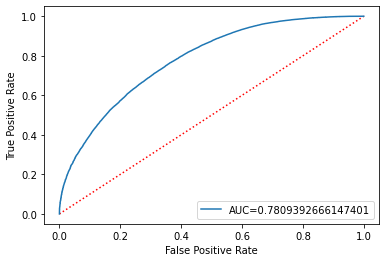

In [224]:
y_pred_proba = model.predict_proba(X_test[vif['Features']])[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle=':', color='red')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### 2) Precision Recall Curve & comments

In [225]:
from sklearn.metrics import precision_recall_curve

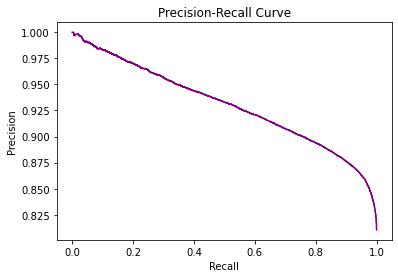

In [226]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

### 3) Classification Report

In [227]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, model.predict(X_test[vif['Features']]))
conf_matrix

array([[ 4893, 11845],
       [ 2089, 69045]], dtype=int64)

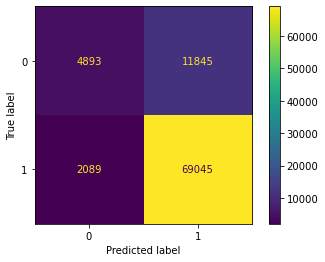

In [228]:
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [229]:
from sklearn.metrics import classification_report

In [230]:
print(classification_report(y_test, model.predict(X_test[vif['Features']])))

              precision    recall  f1-score   support

           0       0.70      0.29      0.41     16738
           1       0.85      0.97      0.91     71134

    accuracy                           0.84     87872
   macro avg       0.78      0.63      0.66     87872
weighted avg       0.82      0.84      0.81     87872



### 4) Tradeoff Questions

### 4. 1) How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

In order to reduce false positive we need to increase the threshold value.But on doing so we will end up increasing the false negative.

What I think we can do is use probability of getting positive for classification instead of binary classification. Using the probabilty we need to come up with various rules to classify (I feel we can have more than 1 rule). 

Else we can think of using a complex model like SVM, Decision Tree, etc.

### 4. 2) Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

In [231]:
df.loan_status.value_counts(normalize=True)

1    0.808214
0    0.191786
Name: loan_status, dtype: float64

Yes. We should not disburse loans to anyone. The eligibility criteria should meet before offering loan services.

In the data set, 19% of people don't pay back the loan (also called NPA). As I mentioned in the previous point in order to reduce false positive we need to increase the threshold but this would increase the false negative.

Best way to deal with it is to use probabilty of paying back loan. A metric based on the probabilty can be created which would indicate various regions (like safe, risk, high risk etc).

Based on the different regions created using probabilty campany can change the eligibilty criteria for giving loans.

## 5. Actionable Insights & Recommendations

From the coefficients of the model it is found that the address (pincode) has the maximum absolute coefficient. This is the most important feature. Care needs to be taken while noting the value of address for a record. As any mistake like human error while noting the value will lead to poor performance of the model.

For this model I have dropped 3 columns (emp_title, title). For making them useful for our model our next step could be to use NLP to get important features from these columns and use them in our model.

I mentioned in previous sections that instead of simply classifying as 0 or 1 we can use probability to get 1 and then analysize on the probabilty to create new rules or decisions and come up with new metric for the problem. The probability can be plotted and the distribution can also help for the metric creation.

Also rather than creating a single model for all financial instruments like Personal Loan, EMI Free Loan, Personal Overdraft and Advance Salary Loan, we can have different models for all these scenarios.

## Questionnaire

### 1) What percentage of customers have fully paid their Loan Amount?

In [232]:
df_original = pd.read_csv('logistic_regression.csv')

In [233]:
df_original.loan_status.value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

80.4% of total customers have fully paid loan amount.

### 2) Comment about the correlation between Loan Amount and Installment features.

In [234]:
from scipy.stats import spearmanr

In [235]:
spearmanr(df_original['loan_amnt'], df_original['installment'])

SpearmanrResult(correlation=0.9683337077962266, pvalue=0.0)

They both are highly corelated to one another. While VIF we removed loan_amount and kept installment.

### 3) The majority of people have home ownership as

In [236]:
df_original.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

The majority of people have home ownership as MORTAGE.

### 4) People with grades ‘A’ are more likely to fully pay their loan

In [237]:
pd.crosstab(df_original['grade'], df_original['loan_status'], normalize='index')

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611


People with grades ‘A’ are more likely to fully pay their loan is completely true.

### 5) Name the top 2 afforded job titles.

In [238]:
df_original.groupby('emp_title')['annual_inc'].mean().reset_index().sort_values('annual_inc').head()

,emp_title,annual_inc
158604,ihss,4080.0
147907,Yogurt Stop,4800.0
7071,Alternatives Unlimited,4800.0
133548,The Art Institute of Phoenix,4800.0
165781,public partnership,4888.0


ihss and Yogurt Stop are the top 2 affordable jobs.

### 6) Thinking from a bank's perspective, which metric should our primary focus be on

We should consider F1 score for this banking usecase because we shouldn’t mispredict the positives (individuals for whom credit line might need to be extended as will be able to pay fully) at the sametime we shouldn’t miss out individual who can fully pay.

### 7) How does the gap in precision and recall affect the bank?

Low precision will lead to losing the business by misppredicting disciplined payees as defaulters.

Low recall will lead to risk by disbursing the loans to defaulter by mispredicting defaulters as disciplined payees.

### 8) Which were the features that heavily affected the outcome?

address, annual_inc, dti and sub_grade will heavily affect the outcome as they have the highest coeeficiens.

### 9) Will the results be affected by geographical location?

Yes. The results will be affected by geographical location.